# Bike Sharing Linear Regression Assignment
### by- Angad Singh Sachdeva

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
rentals = pd.read_csv('day.csv')
rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
rentals.shape

(730, 16)

- 730 rows, 16 columns

In [4]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- 0 null values

In [5]:
rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping 'dteday' because we cannot feed dates to a ML model, and we have separate columns present for month and year.

rentals.drop('dteday',axis=1,inplace=True)

In [7]:
# 'cnt' is our dependent variable. And, it is the sum of casual and registered.
# So, it is safe to drop casual and registered

rentals.drop(['casual','registered'],axis=1,inplace=True)

In [8]:
# Creating new column 'weekend' using 'weekday'
# 1 for weekend, 0 for other days
rentals['weekend'] = rentals.weekday.apply(lambda x: 1 if x==6 or x==0 else 0)

# Making the weekday column more readable
rentals['weekday'] = rentals['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'})


In [9]:
# Making the 'mnth' column more readable
rentals.mnth = rentals.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [10]:
rentals.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,1,1,0,Jan,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,2,1,0,Jan,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801,0
2,3,1,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,4,1,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,5,1,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


In [11]:
# According to data dictionary, if it is not a holiday nor a weekend, it is a working day.
# So, workingday can be deduced using holiday and weekend. 
# Therefore, dropping 'workingday'

rentals.drop('workingday',axis=1,inplace=True)

In [12]:
# Dropping 'instant' as IDs are of no use for ML models.
rentals.drop('instant',axis=1,inplace=True)

In [13]:
# converting season values to names of season according to the data dictionary

rentals.season = rentals.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [14]:
# Converting 'weathersit' values to names according to data dictionary

rentals.weathersit = rentals.weathersit.map({1:'clear',2:'mist',3:'light snow',4:'heavy rain'})

In [15]:
rentals.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,Jan,0,Monday,mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Tuesday,mist,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,0,Jan,0,Wednesday,clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,Jan,0,Thursday,clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,Jan,0,Friday,clear,9.305237,11.46350,43.6957,12.522300,1600,0


<AxesSubplot:xlabel='cnt', ylabel='Density'>

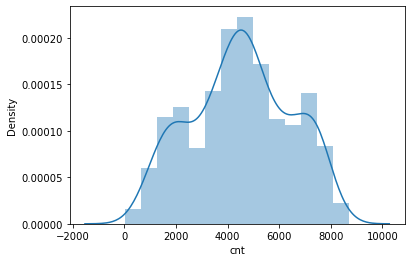

In [16]:
# Let us see how 'cnt' is distributed
sns.distplot(rentals['cnt'])

In [17]:
# Evenly distributed.

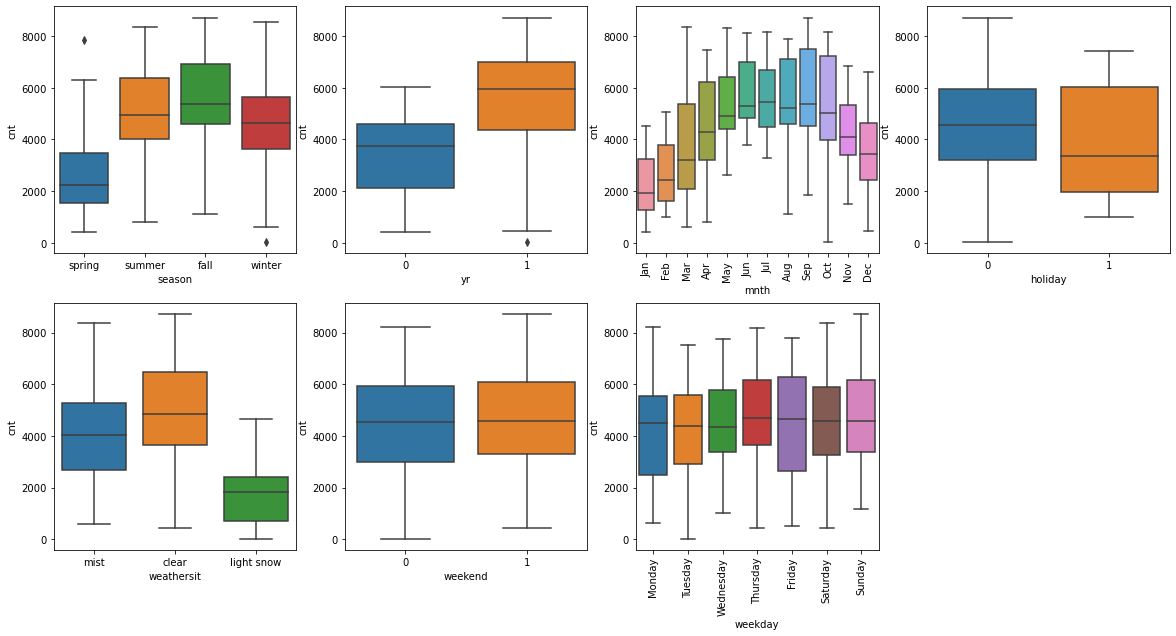

In [18]:
# Effects of season/year/month/holiday/weathersit/weekend/weekday on demand
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot('season','cnt',data=rentals)
plt.subplot(2,4,2)
sns.boxplot('yr','cnt',data=rentals)
plt.subplot(2,4,3)
sns.boxplot('mnth','cnt',data=rentals)
plt.xticks(rotation=90)
plt.subplot(2,4,4)
sns.boxplot('holiday','cnt',data=rentals)
plt.subplot(2,4,5)
sns.boxplot('weathersit','cnt',data=rentals)
plt.subplot(2,4,6)
sns.boxplot('weekend', 'cnt',data=rentals)
plt.subplot(2,4,7)
sns.boxplot('weekday', 'cnt',data=rentals)
plt.xticks(rotation=90)
plt.show()

In [19]:
# Season seems to have an effect on demand
# Clearly visible that demand grew with the year. 2019 has greater demand than 2018
# Also, demand grew mid year.
# Holiday has a visible negative effect on demand
# light snow weather sees a decline in demand, maybe because people do not go out in the cold weather.
# Weekend doesn't seem to have a considerable impact on demand.
# Demand is almost same on all weekdays

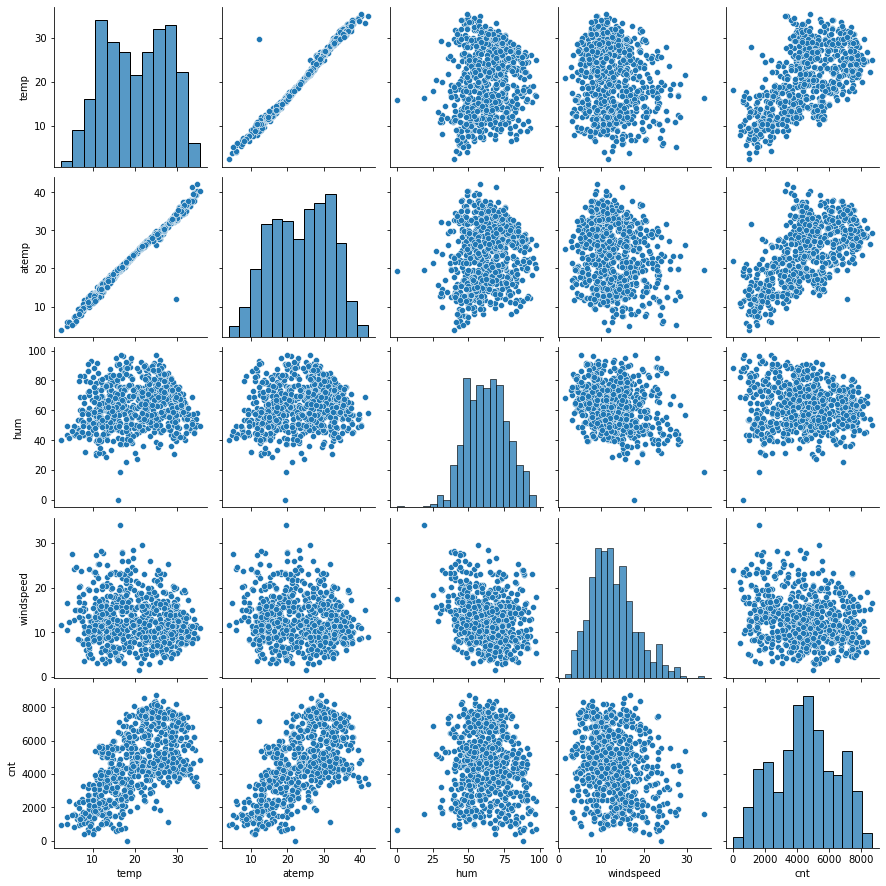

In [20]:
# Seeing correlation between continuous variables.

cont_vars = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(rentals[cont_vars])
plt.show()

In [21]:
# Here, temp and atemp seem to have a clear positive effect on cnt
# Also, temp and atemp are very highly correlated with each other.

<AxesSubplot:>

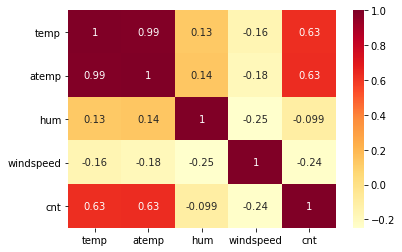

In [22]:
sns.heatmap(rentals[cont_vars].corr(),annot=True,cmap='YlOrRd')

In [23]:
# While, temp and atemp have the same correlation with 'cnt', they seem to be completely correlated with each other
# It is safe to drop either of temp or atemp.

# Dropping atemp

rentals.drop('atemp',axis=1,inplace=True)

In [24]:
# Creating dummy variables for month, season, weathersit, weekday

rentals = pd.concat([rentals,pd.get_dummies(rentals.season,drop_first=True)],axis=1)
rentals.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,weekend,spring,summer,winter
0,spring,0,Jan,0,Monday,mist,14.110847,80.5833,10.749882,985,0,1,0,0
1,spring,0,Jan,0,Tuesday,mist,14.902598,69.6087,16.652113,801,0,1,0,0
2,spring,0,Jan,0,Wednesday,clear,8.050924,43.7273,16.636703,1349,0,1,0,0
3,spring,0,Jan,0,Thursday,clear,8.200000,59.0435,10.739832,1562,0,1,0,0
4,spring,0,Jan,0,Friday,clear,9.305237,43.6957,12.522300,1600,0,1,0,0


In [25]:
rentals = pd.concat([rentals,pd.get_dummies(rentals.mnth,drop_first=True)],axis=1)
rentals.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Monday,mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wednesday,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [26]:
rentals = pd.concat([rentals,pd.get_dummies(rentals.weathersit,drop_first=True)],axis=1)
rentals.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,light snow,mist
0,spring,0,Jan,0,Monday,mist,14.110847,80.5833,10.749882,985,...,1,0,0,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,mist,14.902598,69.6087,16.652113,801,...,1,0,0,0,0,0,0,0,0,1
2,spring,0,Jan,0,Wednesday,clear,8.050924,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,clear,8.200000,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,clear,9.305237,43.6957,12.522300,1600,...,1,0,0,0,0,0,0,0,0,0


In [27]:
rentals = pd.concat([rentals,pd.get_dummies(rentals.weekday,drop_first=True)],axis=1)
rentals.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,light snow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,mist,14.110847,80.5833,10.749882,985,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,mist,14.902598,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Dropping mnth/season/weathersit/weekday

rentals.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
rentals.head()

,yr,holiday,temp,hum,windspeed,cnt,weekend,spring,summer,winter,...,Oct,Sep,light snow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,8.050924,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8.200000,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   temp        730 non-null    float64
 3   hum         730 non-null    float64
 4   windspeed   730 non-null    float64
 5   cnt         730 non-null    int64  
 6   weekend     730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

# Building the model

- Data is prepared for modeling
- Splitting into train-test set
- MinMaxScaling the data

In [30]:
# Splitting into train and test

df_train, df_test = train_test_split(rentals, train_size=0.7, random_state=10)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [31]:
# Scaling the train set

vars_to_scale = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[vars_to_scale] = scaler.fit_transform(df_train[vars_to_scale])
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,weekend,spring,summer,winter,...,Oct,Sep,light snow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
72,0,0,0.298094,0.393891,0.236118,0.194978,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
510,1,0,0.778657,0.694105,0.364071,0.737052,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
700,1,0,0.327249,0.809877,0.210252,0.509236,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
264,0,0,0.694699,0.910249,0.217975,0.526862,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
577,1,0,0.811368,0.624004,0.244886,0.863093,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Splitting in independent(X_train) and dependent(y_train) variables

y_train = df_train.pop('cnt')
X_train = df_train

## Selecting features using RFE

In [33]:
lm= LinearRegression()
lm_model = lm.fit(X_train,y_train)
rfe =RFE(lm_model,15,1)
rfe = rfe.fit(X_train,y_train)
list_rfe = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
list_rfe

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 7),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', False, 4),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 6),
 ('Tuesday', False, 8),
 ('Wednesday', False, 14)]

In [34]:
# Creating a new dataset with the rfe columns

cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,weekend,spring,winter,Dec,Jul,Nov,light snow,mist,Saturday,Sunday
72,0,0,0.298094,0.393891,0.236118,0,1,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.694105,0.364071,1,0,0,0,0,0,0,0,0,1
700,1,0,0.327249,0.809877,0.210252,0,0,1,1,0,0,0,1,0,0
264,0,0,0.694699,0.910249,0.217975,1,0,0,0,0,0,0,1,1,0
577,1,0,0.811368,0.624004,0.244886,0,0,0,0,0,0,0,0,0,0


## Building the first model

In [35]:
X_train_sm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_sm1)
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          5.51e-187
Time:                        17:56:11   Log-Likelihood:                 481.00
No. Observations:                 510   AIC:                            -932.0
Df Residuals:                     495   BIC:                            -868.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3303      0.029     11.396      0.000       0.273       0.387
yr             0.2482      0.009     28.442      0.000       0.231       0.265
holiday       -0.0777      0.024     -3.256      0.001      -0.125      -0.031
temp           0.4521      0.032     14.077      0.000       0.389       0.515
hum           -0.1495      0.034     -4.375      0.000      -0.217      -0.082
windspeed     -0.1789      0.029     -6.215      0.000      -0.235      -0.122
weekend        0.0143      0.006      2.239      0.026       0.002       0.027
spring        -0.1366      0.016     -8.655      0.000      -0.168      -0.106
winter         0.0892      0.014      6.204      0.000       0.061       0.117
Dec           -0.0555      0.017     -3.295      0.001      -0.089      -0.022
Jul           -0.0846      0.019     -4.465      0.000      -0.122      -0.047
Nov           -0.0807      0.019     -4.182      0.000      -0.119      -0.043
light snow    -0.1982      0.029     -6.937      0.000      -0.254      -0.142
mist          -0.0541      0.012     -4.675      0.000      -0.077      -0.031
Saturday       0.0077      0.009      0.874      0.383      -0.010       0.025
Sunday         0.0066      0.009      0.761      0.447      -0.010       0.024
==============================================================================
Omnibus:                       66.701   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.016
Skew:                          -0.664   Prob(JB):                     1.21e-37
Kurtosis:                       5.497   Cond. No.                     9.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
5,weekend,inf
13,Saturday,inf
14,Sunday,inf
3,hum,16.41
2,temp,12.73
4,windspeed,4.75
7,winter,2.78
12,mist,2.49
6,spring,2.46
0,yr,2.07


- High p value, High VIF: 'Sunday', 'Saturday'
- High p value, low VIF: None
- Low p value, High VIF: 'hum', 'temp', 'weekend'

###### Building another model without 'Sunday'

In [37]:
X_train_rfe.pop('Sunday')
X_train_sm2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_sm2)
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          5.51e-187
Time:                        17:56:11   Log-Likelihood:                 481.00
No. Observations:                 510   AIC:                            -932.0
Df Residuals:                     495   BIC:                            -868.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3303      0.029     11.396      0.000       0.273       0.387
yr             0.2482      0.009     28.442      0.000       0.231       0.265
holiday       -0.0777      0.024     -3.256      0.001      -0.125      -0.031
temp           0.4521      0.032     14.077      0.000       0.389       0.515
hum           -0.1495      0.034     -4.375      0.000      -0.217      -0.082
windspeed     -0.1789      0.029     -6.215      0.000      -0.235      -0.122
weekend        0.0209      0.012      1.690      0.092      -0.003       0.045
spring        -0.1366      0.016     -8.655      0.000      -0.168      -0.106
winter         0.0892      0.014      6.204      0.000       0.061       0.117
Dec           -0.0555      0.017     -3.295      0.001      -0.089      -0.022
Jul           -0.0846      0.019     -4.465      0.000      -0.122      -0.047
Nov           -0.0807      0.019     -4.182      0.000      -0.119      -0.043
light snow    -0.1982      0.029     -6.937      0.000      -0.254      -0.142
mist          -0.0541      0.012     -4.675      0.000      -0.077      -0.031
Saturday       0.0012      0.016      0.071      0.944      -0.031       0.033
==============================================================================
Omnibus:                       66.701   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.016
Skew:                          -0.664   Prob(JB):                     1.21e-37
Kurtosis:                       5.497   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
3,hum,16.41
2,temp,12.73
4,windspeed,4.75
7,winter,2.78
12,mist,2.49
6,spring,2.46
5,weekend,2.33
0,yr,2.07
13,Saturday,1.96
10,Nov,1.83


- High p value, High VIF: None
- High p value, low VIF: 'Saturday', 'weekend'
- Low p value, High VIF: 'hum', 'temp'

###### Building another model without 'Saturday'

In [39]:
X_train_rfe.pop('Saturday')
X_train_sm3 = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train,X_train_sm3)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.81e-188
Time:                        17:56:11   Log-Likelihood:                 481.00
No. Observations:                 510   AIC:                            -934.0
Df Residuals:                     496   BIC:                            -874.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3302      0.029     11.407      0.000       0.273       0.387
yr             0.2482      0.009     28.471      0.000       0.231       0.265
holiday       -0.0777      0.024     -3.261      0.001      -0.125      -0.031
temp           0.4522      0.032     14.105      0.000       0.389       0.515
hum           -0.1495      0.034     -4.381      0.000      -0.217      -0.082
windspeed     -0.1790      0.029     -6.233      0.000      -0.235      -0.123
weekend        0.0214      0.010      2.240      0.026       0.003       0.040
spring        -0.1366      0.016     -8.667      0.000      -0.168      -0.106
winter         0.0892      0.014      6.217      0.000       0.061       0.117
Dec           -0.0555      0.017     -3.298      0.001      -0.089      -0.022
Jul           -0.0846      0.019     -4.469      0.000      -0.122      -0.047
Nov           -0.0806      0.019     -4.193      0.000      -0.118      -0.043
light snow    -0.1981      0.028     -6.952      0.000      -0.254      -0.142
mist          -0.0540      0.012     -4.681      0.000      -0.077      -0.031
==============================================================================
Omnibus:                       66.843   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.087
Skew:                          -0.666   Prob(JB):                     1.16e-37
Kurtosis:                       5.496   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
3,hum,16.41
2,temp,12.70
4,windspeed,4.73
7,winter,2.77
12,mist,2.48
6,spring,2.46
0,yr,2.07
10,Nov,1.82
8,Dec,1.46
11,light snow,1.43


- High p value, High VIF: None
- High p value, low VIF: None
- Low p value, High VIF: 'hum', 'temp'

###### Building another model without 'hum'

In [41]:
X_train_rfe.pop('hum')
X_train_sm4 = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train,X_train_sm4)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.05e-185
Time:                        17:56:11   Log-Likelihood:                 471.32
No. Observations:                 510   AIC:                            -916.6
Df Residuals:                     497   BIC:                            -861.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2628      0.025     10.529      0.000       0.214       0.312
yr             0.2556      0.009     29.362      0.000       0.239       0.273
holiday       -0.0781      0.024     -3.219      0.001      -0.126      -0.030
temp           0.4141      0.031     13.181      0.000       0.352       0.476
windspeed     -0.1382      0.028     -4.997      0.000      -0.193      -0.084
weekend        0.0236      0.010      2.426      0.016       0.004       0.043
spring        -0.1418      0.016     -8.864      0.000      -0.173      -0.110
winter         0.0826      0.015      5.688      0.000       0.054       0.111
Dec           -0.0604      0.017     -3.532      0.000      -0.094      -0.027
Jul           -0.0730      0.019     -3.825      0.000      -0.110      -0.035
Nov           -0.0828      0.020     -4.230      0.000      -0.121      -0.044
light snow    -0.2627      0.025    -10.583      0.000      -0.311      -0.214
mist          -0.0848      0.009     -9.107      0.000      -0.103      -0.067
==============================================================================
Omnibus:                       71.781   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.929
Skew:                          -0.691   Prob(JB):                     2.85e-43
Kurtosis:                       5.704   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
3,windspeed,4.72
2,temp,4.60
6,winter,2.51
0,yr,2.05
5,spring,1.84
9,Nov,1.79
11,mist,1.54
7,Dec,1.42
4,weekend,1.39
8,Jul,1.32


- All p values and VIFs are uder control

###### Let's see if we can improve the model by adding the 2nd ranked feature according to RFE

In [43]:
# Concatenating the second rank feature to our matrix of features

rank_2_col = X_train.columns[rfe.ranking_==2][0]
X_train_rfe = pd.concat([X_train_rfe,X_train[rank_2_col]],axis=1)

###### Building the model

In [44]:
X_train_sm5 = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train,X_train_sm5)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.1
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          7.59e-186
Time:                        17:56:11   Log-Likelihood:                 475.54
No. Observations:                 510   AIC:                            -923.1
Df Residuals:                     496   BIC:                            -863.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2798      0.025     10.983      0.000       0.230       0.330
yr             0.2552      0.009     29.525      0.000       0.238       0.272
holiday       -0.0779      0.024     -3.232      0.001      -0.125      -0.031
temp           0.3919      0.032     12.195      0.000       0.329       0.455
windspeed     -0.1445      0.028     -5.245      0.000      -0.199      -0.090
weekend        0.0227      0.010      2.350      0.019       0.004       0.042
spring        -0.1292      0.016     -7.848      0.000      -0.162      -0.097
winter         0.0826      0.014      5.732      0.000       0.054       0.111
Dec           -0.0728      0.018     -4.155      0.000      -0.107      -0.038
Jul           -0.0686      0.019     -3.610      0.000      -0.106      -0.031
Nov           -0.0892      0.020     -4.560      0.000      -0.128      -0.051
light snow    -0.2630      0.025    -10.671      0.000      -0.311      -0.215
mist          -0.0847      0.009     -9.162      0.000      -0.103      -0.067
Jan           -0.0546      0.019     -2.875      0.004      -0.092      -0.017
==============================================================================
Omnibus:                       75.519   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.449
Skew:                          -0.713   Prob(JB):                     2.71e-47
Kurtosis:                       5.838   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
3,windspeed,4.72
2,temp,4.63
6,winter,2.54
5,spring,2.46
0,yr,2.05
9,Nov,1.80
12,Jan,1.61
11,mist,1.55
7,Dec,1.47
4,weekend,1.39


###### Adding the second ranked variable to the model incresed the R squared, also, it turned out to be significant
###### Adding the 3rd ranked feature to the model

In [46]:
# Concatenating the third ranked feature to our matrix of features

rank_3_col = X_train.columns[rfe.ranking_==3][0]
X_train_rfe = pd.concat([X_train_rfe,X_train[rank_3_col]],axis=1)

###### Building the model

In [47]:
X_train_sm6 = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train,X_train_sm6)
lr6_model = lr6.fit()
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.78e-186
Time:                        17:56:11   Log-Likelihood:                 479.01
No. Observations:                 510   AIC:                            -928.0
Df Residuals:                     495   BIC:                            -864.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2905      0.026     11.322      0.000       0.240       0.341
yr             0.2558      0.009     29.756      0.000       0.239       0.273
holiday       -0.0768      0.024     -3.206      0.001      -0.124      -0.030
temp           0.3752      0.033     11.516      0.000       0.311       0.439
windspeed     -0.1440      0.027     -5.257      0.000      -0.198      -0.090
weekend        0.0226      0.010      2.355      0.019       0.004       0.041
spring        -0.1033      0.019     -5.396      0.000      -0.141      -0.066
winter         0.0858      0.014      5.964      0.000       0.058       0.114
Dec           -0.0896      0.019     -4.825      0.000      -0.126      -0.053
Jul           -0.0652      0.019     -3.441      0.001      -0.102      -0.028
Nov           -0.0972      0.020     -4.940      0.000      -0.136      -0.059
light snow    -0.2633      0.025    -10.744      0.000      -0.311      -0.215
mist          -0.0858      0.009     -9.320      0.000      -0.104      -0.068
Jan           -0.0881      0.023     -3.857      0.000      -0.133      -0.043
Feb           -0.0594      0.023     -2.606      0.009      -0.104      -0.015
==============================================================================
Omnibus:                       85.220   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.585
Skew:                          -0.795   Prob(JB):                     1.05e-54
Kurtosis:                       6.028   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
3,windspeed,4.76
2,temp,4.70
5,spring,4.21
6,winter,2.60
12,Jan,2.29
13,Feb,2.14
0,yr,2.05
9,Nov,1.83
7,Dec,1.64
11,mist,1.55


###### Adding the 3d ranked variable to the model incresed the R squared, also, it turned out to be significant
###### Adding the 4th ranked feature to the model

In [49]:
# Concatenating the 4th ranked feature to our matrix of features

rank_4_col = X_train.columns[rfe.ranking_==4][0]
X_train_rfe = pd.concat([X_train_rfe,X_train[rank_4_col]],axis=1)

###### Building the model

In [50]:
X_train_sm7 = sm.add_constant(X_train_rfe)
lr7 = sm.OLS(y_train,X_train_sm7)
lr7_model = lr7.fit()
lr7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.69e-186
Time:                        17:56:11   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -933.1
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2935      0.026     11.495      0.000       0.243       0.344
yr             0.2563      0.009     29.985      0.000       0.240       0.273
holiday       -0.0781      0.024     -3.278      0.001      -0.125      -0.031
temp           0.3598      0.033     10.930      0.000       0.295       0.424
windspeed     -0.1399      0.027     -5.133      0.000      -0.194      -0.086
weekend        0.0218      0.010      2.279      0.023       0.003       0.041
spring        -0.1033      0.019     -5.427      0.000      -0.141      -0.066
winter         0.0826      0.014      5.755      0.000       0.054       0.111
Dec           -0.0859      0.019     -4.635      0.000      -0.122      -0.049
Jul           -0.0554      0.019     -2.890      0.004      -0.093      -0.018
Nov           -0.0918      0.020     -4.664      0.000      -0.130      -0.053
light snow    -0.2685      0.024    -10.987      0.000      -0.317      -0.220
mist          -0.0876      0.009     -9.550      0.000      -0.106      -0.070
Jan           -0.0887      0.023     -3.909      0.000      -0.133      -0.044
Feb           -0.0592      0.023     -2.613      0.009      -0.104      -0.015
Sep            0.0412      0.016      2.635      0.009       0.010       0.072
==============================================================================
Omnibus:                       89.698   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.221
Skew:                          -0.836   Prob(JB):                     1.15e-57
Kurtosis:                       6.089   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
2,temp,5.08
3,windspeed,4.80
5,spring,4.21
6,winter,2.61
12,Jan,2.29
13,Feb,2.14
0,yr,2.05
9,Nov,1.86
7,Dec,1.66
11,mist,1.56


- 'windspeed' and 'temp'have a high VIF but low p values.
- even though 'temp' has higher VIF, dropping 'windspeed' because 'temp' is more correlated with the target variable

###### Building another model without 'windspeed'

In [52]:
X_train_rfe.drop('windspeed',axis=1,inplace=True)
X_train_sm8 = sm.add_constant(X_train_rfe)
lr8 = sm.OLS(y_train,X_train_sm8)
lr8_model = lr8.fit()
lr8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          4.39e-182
Time:                        17:56:11   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -908.6
Df Residuals:                     495   BIC:                            -845.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      0.023     10.032      0.000       0.189       0.281
yr             0.2561      0.009     29.219      0.000       0.239       0.273
holiday       -0.0825      0.024     -3.381      0.001      -0.130      -0.035
temp           0.3754      0.034     11.172      0.000       0.309       0.441
weekend        0.0208      0.010      2.127      0.034       0.002       0.040
spring        -0.1072      0.020     -5.495      0.000      -0.145      -0.069
winter         0.0911      0.015      6.237      0.000       0.062       0.120
Dec           -0.0792      0.019     -4.182      0.000      -0.116      -0.042
Jul           -0.0483      0.020     -2.461      0.014      -0.087      -0.010
Nov           -0.0938      0.020     -4.653      0.000      -0.133      -0.054
light snow    -0.2826      0.025    -11.353      0.000      -0.332      -0.234
mist          -0.0865      0.009     -9.201      0.000      -0.105      -0.068
Jan           -0.0816      0.023     -3.515      0.000      -0.127      -0.036
Feb           -0.0600      0.023     -2.583      0.010      -0.106      -0.014
Sep            0.0457      0.016      2.855      0.004       0.014       0.077
==============================================================================
Omnibus:                       91.100   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.023
Skew:                          -0.823   Prob(JB):                     2.86e-63
Kurtosis:                       6.293   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['vif'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='vif',ascending=False)

,features,vif
4,spring,3.91
2,temp,3.04
5,winter,2.60
11,Jan,2.28
12,Feb,2.12
0,yr,2.04
8,Nov,1.82
6,Dec,1.65
10,mist,1.55
3,weekend,1.39


###### Adding the 4th ranked variable to the model incresed the R squared, also, it turned out to be significant
###### It increased the VIF of 2 features, which has been corrected

###### Adding the 5th ranked feature to the model

In [54]:
# Concatenating the 5th ranked feature to our matrix of features

rank_5_col = X_train.columns[rfe.ranking_==5][0]
X_train_rfe = pd.concat([X_train_rfe,X_train[rank_5_col]],axis=1)

###### Building the model

In [55]:
X_train_sm9 = sm.add_constant(X_train_rfe)
lr9 = sm.OLS(y_train,X_train_sm9)
lr9_model = lr9.fit()
lr9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.82e-181
Time:                        17:56:11   Log-Likelihood:                 470.09
No. Observations:                 510   AIC:                            -908.2
Df Residuals:                     494   BIC:                            -840.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2304      0.024      9.722      0.000       0.184       0.277
yr             0.2568      0.009     29.254      0.000       0.240       0.274
holiday       -0.0829      0.024     -3.397      0.001      -0.131      -0.035
temp           0.3748      0.034     11.159      0.000       0.309       0.441
weekend        0.0205      0.010      2.095      0.037       0.001       0.040
spring        -0.1027      0.020     -5.182      0.000      -0.142      -0.064
winter         0.0950      0.015      6.358      0.000       0.066       0.124
Dec           -0.0787      0.019     -4.153      0.000      -0.116      -0.041
Jul           -0.0434      0.020     -2.167      0.031      -0.083      -0.004
Nov           -0.0932      0.020     -4.619      0.000      -0.133      -0.054
light snow    -0.2817      0.025    -11.316      0.000      -0.331      -0.233
mist          -0.0870      0.009     -9.243      0.000      -0.105      -0.068
Jan           -0.0815      0.023     -3.511      0.000      -0.127      -0.036
Feb           -0.0599      0.023     -2.581      0.010      -0.106      -0.014
Sep            0.0495      0.016      3.036      0.003       0.017       0.081
May            0.0207      0.017      1.225      0.221      -0.012       0.054
==============================================================================
Omnibus:                       92.357   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.908
Skew:                          -0.827   Prob(JB):                     1.24e-65
Kurtosis:                       6.366   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The 5th ranked column, i.e May, had no effect on the R Squared and also it turned out to be insignificant
###### We will drop 'May' from our model, and no other features should be added


###### The final model will be one of 'lr6_model and 'lr8_model'

In [56]:
X_train_rfe.drop('May',axis=1,inplace=True)

# The Final Model

- There are 2 candidates for the final model.

- lr6_model
- lr8_model

In [57]:
lr8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          4.39e-182
Time:                        17:56:11   Log-Likelihood:                 469.32
No. Observations:                 510   AIC:                            -908.6
Df Residuals:                     495   BIC:                            -845.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      0.023     10.032      0.000       0.189       0.281
yr             0.2561      0.009     29.219      0.000       0.239       0.273
holiday       -0.0825      0.024     -3.381      0.001      -0.130      -0.035
temp           0.3754      0.034     11.172      0.000       0.309       0.441
weekend        0.0208      0.010      2.127      0.034       0.002       0.040
spring        -0.1072      0.020     -5.495      0.000      -0.145      -0.069
winter         0.0911      0.015      6.237      0.000       0.062       0.120
Dec           -0.0792      0.019     -4.182      0.000      -0.116      -0.042
Jul           -0.0483      0.020     -2.461      0.014      -0.087      -0.010
Nov           -0.0938      0.020     -4.653      0.000      -0.133      -0.054
light snow    -0.2826      0.025    -11.353      0.000      -0.332      -0.234
mist          -0.0865      0.009     -9.201      0.000      -0.105      -0.068
Jan           -0.0816      0.023     -3.515      0.000      -0.127      -0.036
Feb           -0.0600      0.023     -2.583      0.010      -0.106      -0.014
Sep            0.0457      0.016      2.855      0.004       0.014       0.077
==============================================================================
Omnibus:                       91.100   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.023
Skew:                          -0.823   Prob(JB):                     2.86e-63
Kurtosis:                       6.293   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.78e-186
Time:                        17:56:11   Log-Likelihood:                 479.01
No. Observations:                 510   AIC:                            -928.0
Df Residuals:                     495   BIC:                            -864.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2905      0.026     11.322      0.000       0.240       0.341
yr             0.2558      0.009     29.756      0.000       0.239       0.273
holiday       -0.0768      0.024     -3.206      0.001      -0.124      -0.030
temp           0.3752      0.033     11.516      0.000       0.311       0.439
windspeed     -0.1440      0.027     -5.257      0.000      -0.198      -0.090
weekend        0.0226      0.010      2.355      0.019       0.004       0.041
spring        -0.1033      0.019     -5.396      0.000      -0.141      -0.066
winter         0.0858      0.014      5.964      0.000       0.058       0.114
Dec           -0.0896      0.019     -4.825      0.000      -0.126      -0.053
Jul           -0.0652      0.019     -3.441      0.001      -0.102      -0.028
Nov           -0.0972      0.020     -4.940      0.000      -0.136      -0.059
light snow    -0.2633      0.025    -10.744      0.000      -0.311      -0.215
mist          -0.0858      0.009     -9.320      0.000      -0.104      -0.068
Jan           -0.0881      0.023     -3.857      0.000      -0.133      -0.043
Feb           -0.0594      0.023     -2.606      0.009      -0.104      -0.015
==============================================================================
Omnibus:                       85.220   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.585
Skew:                          -0.795   Prob(JB):                     1.05e-54
Kurtosis:                       6.028   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### In both models, p values and VIFs are under control.
###### Although, lr6_model has a better AIC, R-Squared, and, Adjusted R-Squared

# Choosing lr6_model as the final model

###### Residual Analysis

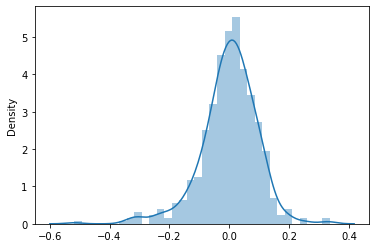

In [59]:
res = y_train - lr6_model.predict(X_train_sm6)
sns.distplot(res)
plt.show()

In [71]:
round(res.mean(),3)

-0.0

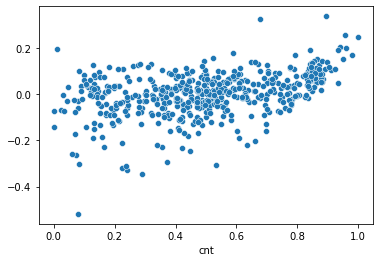

In [61]:
sns.scatterplot(y_train,res)
plt.show()

- Residuals are normally distributed with mean 0
- Residuals show no pattern, that is, they are randomly distributed

###### The model is good to go

# Predicting on test set

In [62]:
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,weekend,spring,summer,winter,...,Oct,Sep,light snow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
566,1,0,24.429153,86.5417,14.291100,4459,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
374,1,0,12.656536,64.6522,12.565984,3598,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
181,0,0,29.622500,39.6250,6.874736,5362,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
529,1,0,26.581653,56.9583,17.000111,7363,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,28.358347,47.0000,18.542250,4758,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


###### Scaling to the train set scale

In [63]:
df_test[vars_to_scale] = scaler.transform(df_test[vars_to_scale])
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,weekend,spring,summer,winter,...,Oct,Sep,light snow,mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
566,1,0,0.652175,0.863516,0.393568,0.486297,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
374,1,0,0.276477,0.584521,0.340487,0.382349,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
181,0,0,0.817910,0.265533,0.165370,0.595316,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
529,1,0,0.720868,0.486457,0.476922,0.836895,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,0.777567,0.359532,0.524373,0.522395,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# Splitting into independent(X_test) and dependent(y_test)

y_test = df_test.pop('cnt')
X_test = df_test[X_train_sm6.drop('const',axis=1).columns]
X_test.head()

,yr,holiday,temp,windspeed,weekend,spring,winter,Dec,Jul,Nov,light snow,mist,Jan,Feb
566,1,0,0.652175,0.393568,1,0,0,0,1,0,1,0,0,0
374,1,0,0.276477,0.340487,0,1,0,0,0,0,0,0,1,0
181,0,0,0.817910,0.165370,1,0,0,0,1,0,0,0,0,0
529,1,0,0.720868,0.476922,0,0,0,0,0,0,0,0,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0,0,0,0,0,0


In [65]:
# Predicting values on the test set

y_test_pred = lr6_model.predict(sm.add_constant(X_test))

### R Squared for the test prediction

In [66]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8207849548813995

- R Squared of the test prediction is 0.82 which is very close to the R Squared of the model, which is, 0.839
- My model explains 82% of variance in the test set
- The model is a good fit, and everything shows that the fit is not just by chance.

# Line graph of actual vs predicted values

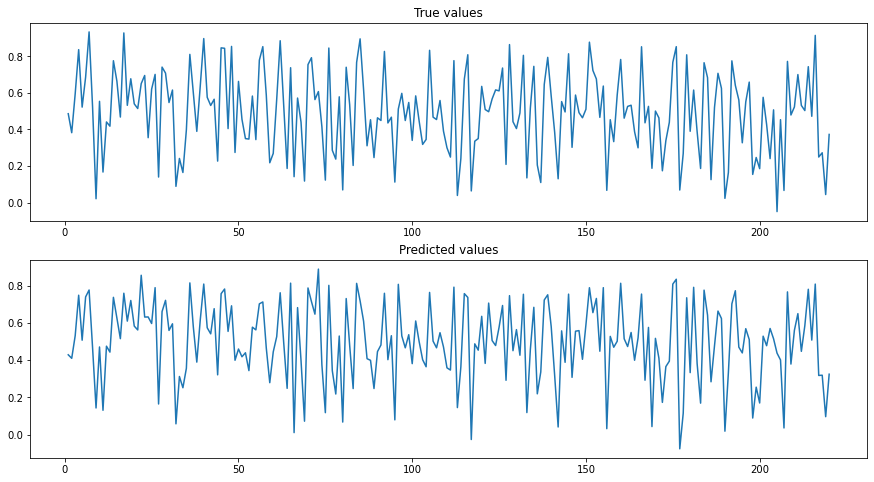

In [67]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot([i+1 for i in range(220)],y_test)
plt.title('True values')
plt.subplot(2,1,2)
plt.plot([i+1 for i in range(220)],y_test_pred)
plt.title('Predicted values')
plt.show()

- Both graphs follow similar patterns, hence proving the accuracy of the model

###### Distribution of predictions with respect to actual values

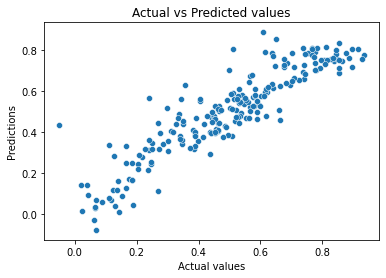

In [68]:
sns.scatterplot(y_test,y_test_pred)
plt.ylabel('Predictions')
plt.xlabel('Actual values')
plt.title('Actual vs Predicted values')
plt.show()

- This clearly shows a linear pattern
- It means that the actual and predicted values are highly correlated
- The model has done its job well.

# Final Equation

###### cnt = 0.2905 + 0.2558*yr - 0.0768*holiday + 0.3752*temp - 0.114*windspeed  + 0.0226*weekend - 0.1033*spring+ 0.0858*winter - 0.0896*Dec -0.0652*Jul - 0.0972*Nov - 0.0881*Jan - 0.0594*Feb - 0.2633*light_snow - 0.0858*mist

###### The demand depends positiively on the year, temperature, weekend, and the winter season

###### The demand depends negatively on holidays, windspeed, spring season, light snow, mist, and decreases in the months of Jan, Feb, Jul, Nov, and Dec